In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [329]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [330]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354307 entries, 0 to 1354306
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1354307 non-null  int64  
 1   kWh       1354307 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 20.7 MB


In [331]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1354302    0.14
1354303    0.14
1354304    0.14
1354305    0.14
1354306    0.14
Name: kWh, Length: 1354307, dtype: float64

In [332]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1354302    0.14
1354303    0.14
1354304    0.14
1354305    0.14
1354306    0.14
Name: kWh, Length: 1354307, dtype: float64

In [333]:
l=len(conso_data)-1
l

1354306

In [334]:
conso_data['sec']=conso_data['Interval']/1000


In [335]:
conso_data['Wh']=3600000/conso_data['Interval']


In [336]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [337]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354307 entries, 0 to 1354306
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1354307 non-null  int64  
 1   kWh        1354307 non-null  float64
 2   sec        1354307 non-null  float64
 3   Wh         1354307 non-null  float64
 4   cumul(ms)  1354307 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 51.7 MB


In [338]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1354302,26160,0.14,26.160,137.614679,31882093831
1354303,26094,0.14,26.094,137.962750,31882119925
1354304,26198,0.14,26.198,137.415070,31882146123
1354305,25771,0.14,25.771,139.691902,31882171894
1354306,25536,0.14,25.536,140.977444,31882197430


In [339]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

31882197430000

In [340]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 17, 30, 506020)

In [341]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [342]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [343]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [344]:
conso_data['dates']

0         2023-08-21 19:17:52.440020
1         2023-08-21 19:18:14.298020
2         2023-08-21 19:18:36.299020
3         2023-08-21 19:18:58.227020
4         2023-08-21 19:19:20.118020
                     ...            
1354302   2024-08-24 19:25:44.337020
1354303   2024-08-24 19:26:10.431020
1354304   2024-08-24 19:26:36.629020
1354305   2024-08-24 19:27:02.400020
1354306   2024-08-24 19:27:27.936020
Name: dates, Length: 1354307, dtype: datetime64[ns]

In [345]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:17:52.440020,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:18:14.298020,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:18:36.299020,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:18:58.227020,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:19:20.118020,21/08/23
...,...,...,...,...,...,...,...
1354302,26160,0.14,26.160,137.614679,31882093831,2024-08-24 19:25:44.337020,24/08/24
1354303,26094,0.14,26.094,137.962750,31882119925,2024-08-24 19:26:10.431020,24/08/24
1354304,26198,0.14,26.198,137.415070,31882146123,2024-08-24 19:26:36.629020,24/08/24
1354305,25771,0.14,25.771,139.691902,31882171894,2024-08-24 19:27:02.400020,24/08/24


In [346]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('24/08/24', 24, 8, 2024)

In [347]:
here = now.strftime('%H:%M:%S')
here

'19:27:56'

In [348]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [349]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3001 entries, 1351306 to 1354306
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3001 non-null   int64         
 1   kWh        3001 non-null   float64       
 2   sec        3001 non-null   float64       
 3   Wh         3001 non-null   float64       
 4   cumul(ms)  3001 non-null   int64         
 5   dates      3001 non-null   datetime64[ns]
 6   days       3001 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 187.6+ KB


In [350]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [351]:
data = list(df_grp['kWh'])
print(data)


[0.811, 3.7, 4.226, 3.679, 4.185, 4.594, 3.535, 3.424, 3.512, 3.691, 3.745, 3.821, 4.25, 3.784, 3.493, 3.631, 3.324, 3.383, 4.274, 4.008, 4.044, 3.933, 3.449, 4.439, 3.76, 3.76, 4.312, 4.713, 3.828, 3.223, 3.178, 3.986, 3.687, 3.153, 3.799, 4.123, 3.773, 3.581, 4.765, 4.2, 4.534, 3.778, 3.409, 4.308, 3.878, 3.855, 3.443, 4.08, 3.657, 3.399, 4.139, 3.383, 3.881, 3.836, 3.637, 3.759, 4.248, 3.297, 3.877, 2.99, 2.055, 2.042, 2.443, 4.085, 3.72, 4.328, 3.614, 3.93, 3.741, 3.897, 4.006, 4.108, 3.658, 3.153, 3.804, 3.507, 3.628, 3.666, 3.722, 3.248, 3.86, 3.251, 3.796, 3.613, 4.076, 3.564, 3.387, 3.816, 4.062, 4.331, 4.136, 3.998, 4.237, 3.742, 3.929, 3.858, 3.916, 3.734, 4.053, 4.346, 3.886, 3.504, 3.683, 3.667, 3.348, 3.843, 4.004, 4.1, 3.478, 4.174, 3.599, 4.06, 4.551, 3.676, 3.439, 3.579, 4.148, 3.704, 4.093, 3.98, 3.746, 3.59, 5.125, 3.704, 3.765, 4.285, 4.109, 4.69, 4.409, 4.001, 3.76, 4.308, 4.745, 4.186, 4.795, 4.313, 3.733, 4.169, 3.699, 3.662, 3.532, 3.929, 3.686, 3.784, 3.581, 3.4

In [352]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [353]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [354]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [355]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.304749
dtype: float64

In [356]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.660289
dtype: float64

In [357]:
last=df_grp.iloc[-1]['kWh']
last

3.001

In [358]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3001 entries, 1351306 to 1354306
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3001 non-null   int64         
 1   kWh        3001 non-null   float64       
 2   sec        3001 non-null   float64       
 3   Wh         3001 non-null   float64       
 4   cumul(ms)  3001 non-null   int64         
 5   dates      3001 non-null   datetime64[ns]
 6   days       3001 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 187.6+ KB


In [359]:
day = today

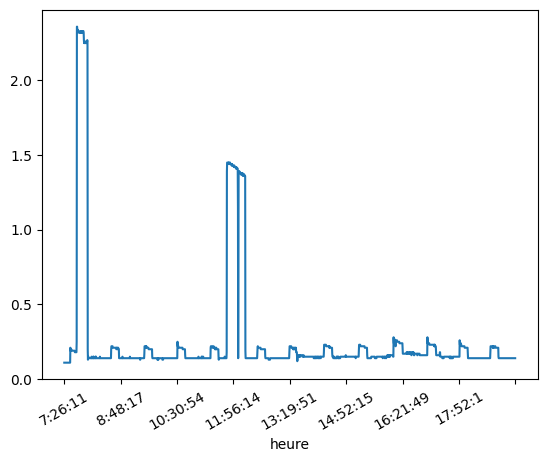

In [360]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [361]:
conso_day['heure']


1351306      0:0:11
1351307      0:0:37
1351308       0:1:3
1351309      0:1:28
1351310      0:1:52
             ...   
1354302    19:25:44
1354303    19:26:10
1354304    19:26:36
1354305     19:27:2
1354306    19:27:27
Name: heure, Length: 3001, dtype: object

In [362]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:11',
              days   kWh
  heure                 
  0:0:11  24/08/24  0.14),
 ('0:0:37',
              days   kWh
  heure                 
  0:0:37  24/08/24  0.14),
 ('0:1:3',
             days   kWh
  heure                
  0:1:3  24/08/24  0.14),
 ('0:1:28',
              days   kWh
  heure                 
  0:1:28  24/08/24  0.14),
 ('0:1:52',
              days   kWh
  heure                 
  0:1:52  24/08/24  0.14),
 ('0:2:18',
              days   kWh
  heure                 
  0:2:18  24/08/24  0.14),
 ('0:2:44',
              days   kWh
  heure                 
  0:2:44  24/08/24  0.14),
 ('0:3:10',
              days   kWh
  heure                 
  0:3:10  24/08/24  0.14),
 ('0:3:35',
              days   kWh
  heure                 
  0:3:35  24/08/24  0.14),
 ('0:4:1',
             days   kWh
  heure                
  0:4:1  24/08/24  0.14),
 ('0:4:27',
              days   kWh
  heure                 
  0:4:27  24/08/24  0.14),
 ('0:4:53',
              day

In [363]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:11',
  heure
  0:0:11    0.14
  Name: kWh, dtype: float64),
 ('0:0:37',
  heure
  0:0:37    0.14
  Name: kWh, dtype: float64),
 ('0:1:3',
  heure
  0:1:3    0.14
  Name: kWh, dtype: float64),
 ('0:1:28',
  heure
  0:1:28    0.14
  Name: kWh, dtype: float64),
 ('0:1:52',
  heure
  0:1:52    0.14
  Name: kWh, dtype: float64),
 ('0:2:18',
  heure
  0:2:18    0.14
  Name: kWh, dtype: float64),
 ('0:2:44',
  heure
  0:2:44    0.14
  Name: kWh, dtype: float64),
 ('0:3:10',
  heure
  0:3:10    0.14
  Name: kWh, dtype: float64),
 ('0:3:35',
  heure
  0:3:35    0.14
  Name: kWh, dtype: float64),
 ('0:4:1',
  heure
  0:4:1    0.14
  Name: kWh, dtype: float64),
 ('0:4:27',
  heure
  0:4:27    0.14
  Name: kWh, dtype: float64),
 ('0:4:53',
  heure
  0:4:53    0.14
  Name: kWh, dtype: float64),
 ('0:5:20',
  heure
  0:5:20    0.14
  Name: kWh, dtype: float64),
 ('0:5:46',
  heure
  0:5:46    0.14
  Name: kWh, dtype: float64),
 ('0:6:11',
  heure
  0:6:11    0.14
  Name: kWh, dtype: float64),

In [364]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:11,26474,0.14,26.474,135.982473,31812160735,2024-08-24 00:00:11.241020,24/08/24
0:0:37,26571,0.14,26.571,135.486056,31812187306,2024-08-24 00:00:37.812020,24/08/24
0:1:3,25533,0.14,25.533,140.994008,31812212839,2024-08-24 00:01:03.345020,24/08/24
0:1:28,24803,0.14,24.803,145.143733,31812237642,2024-08-24 00:01:28.148020,24/08/24
0:1:52,24805,0.14,24.805,145.132030,31812262447,2024-08-24 00:01:52.953020,24/08/24
...,...,...,...,...,...,...,...
19:25:44,26160,0.14,26.160,137.614679,31882093831,2024-08-24 19:25:44.337020,24/08/24
19:26:10,26094,0.14,26.094,137.962750,31882119925,2024-08-24 19:26:10.431020,24/08/24
19:26:36,26198,0.14,26.198,137.415070,31882146123,2024-08-24 19:26:36.629020,24/08/24


In [365]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [366]:
df.iloc[0].dates

Timestamp('2024-08-24 00:00:11.241020')

In [367]:
df.dates.dt.time

heure
0:0:11      00:00:11.241020
0:0:37      00:00:37.812020
0:1:3       00:01:03.345020
0:1:28      00:01:28.148020
0:1:52      00:01:52.953020
                 ...       
19:25:44    19:25:44.337020
19:26:10    19:26:10.431020
19:26:36    19:26:36.629020
19:27:2     19:27:02.400020
19:27:27    19:27:27.936020
Name: dates, Length: 3001, dtype: object

In [368]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [369]:
tranches = len(df)//1000
tranches+1

4

In [370]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-08-24 00:00:11.241020	2024-08-24 07:25:04.813020	7h 24m 53s 	1000
2024-08-24 07:25:04.813020	2024-08-24 13:19:17.887020	5h 54m 13s 	2000
2024-08-24 13:19:17.887020	2024-08-24 19:27:02.400020	6h 7m 44s 	3000
2024-08-24 19:27:02.400020	2024-08-24 19:27:27.936020	0h 0m 25s 	1


In [371]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('19:27:56', 3.001, 3001)

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3001 entries, 0:0:11 to 19:27:27
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3001 non-null   int64         
 1   kWh        3001 non-null   float64       
 2   sec        3001 non-null   float64       
 3   Wh         3001 non-null   float64       
 4   cumul(ms)  3001 non-null   int64         
 5   dates      3001 non-null   datetime64[ns]
 6   days       3001 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 252.1+ KB


In [373]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [374]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 21/08/23 to 24/08/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     370 non-null    float64
dtypes: float64(1)
memory usage: 5.8+ KB


In [375]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [376]:
span = 14

In [377]:
df_grp.tail(span)

,kWh
days,
11/08/24,3.694
12/08/24,4.378
13/08/24,4.359
14/08/24,3.591
15/08/24,4.018
16/08/24,3.902
17/08/24,3.945
18/08/24,3.868
19/08/24,3.643


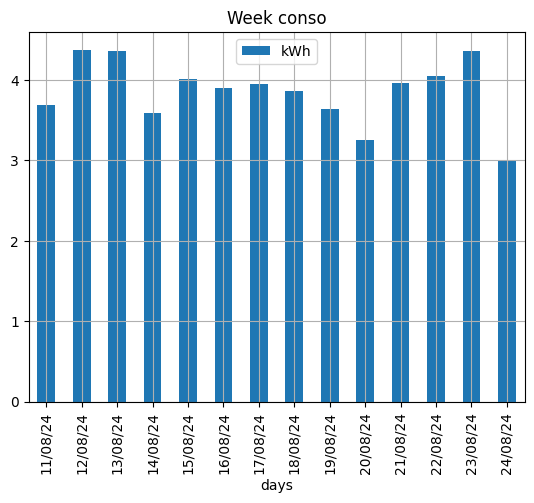

In [378]:
# last week conso
df_grp.tail(span).plot.bar(grid=True) 
plt.title('Week conso')
plt.xticks(rotation=90);

In [379]:
x_labels = list(df_grp.tail(span)['kWh'])
x_labels

[3.694,
 4.378,
 4.359,
 3.591,
 4.018,
 3.902,
 3.945,
 3.868,
 3.643,
 3.255,
 3.967,
 4.049,
 4.358,
 3.001]

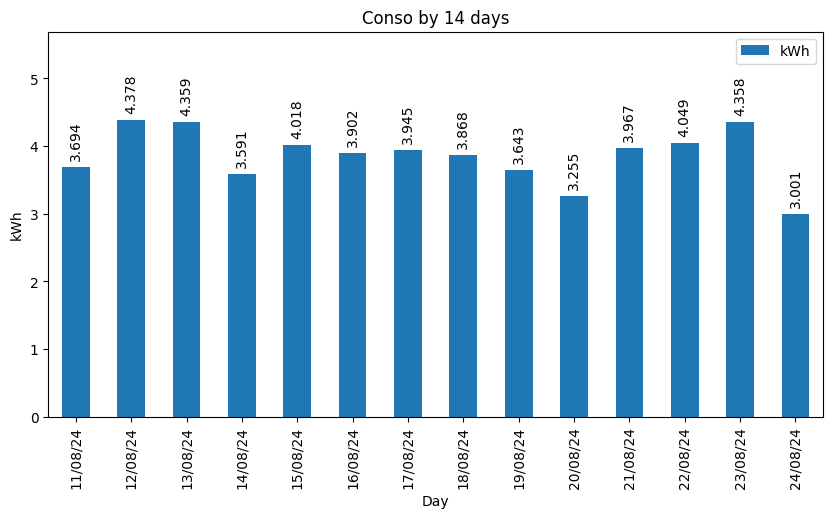

In [380]:
# Plot the figure with labels.
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [381]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
11/08/24    3.694
12/08/24    4.378
13/08/24    4.359
14/08/24    3.591
15/08/24    4.018
16/08/24    3.902
17/08/24    3.945
18/08/24    3.868
19/08/24    3.643
20/08/24    3.255
21/08/24    3.967
22/08/24    4.049
23/08/24    4.358
24/08/24    3.001
Name: kWh, dtype: float64

In [382]:
x_labels=df_grp.tail(span).index
x_labels

Index(['11/08/24', '12/08/24', '13/08/24', '14/08/24', '15/08/24', '16/08/24',
       '17/08/24', '18/08/24', '19/08/24', '20/08/24', '21/08/24', '22/08/24',
       '23/08/24', '24/08/24'],
      dtype='object', name='days')

[Text(0, 10, '3.694'),
 Text(0, 10, '4.378'),
 Text(0, 10, '4.359'),
 Text(0, 10, '3.591'),
 Text(0, 10, '4.018'),
 Text(0, 10, '3.902'),
 Text(0, 10, '3.945'),
 Text(0, 10, '3.868'),
 Text(0, 10, '3.643'),
 Text(0, 10, '3.255'),
 Text(0, 10, '3.967'),
 Text(0, 10, '4.049'),
 Text(0, 10, '4.358'),
 Text(0, 10, '3.001')]

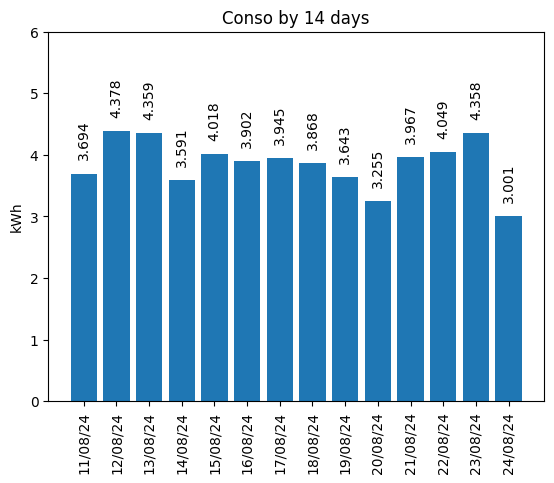

In [383]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots()
bar_container = ax.bar(x_labels, y_labels)
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);

#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')

In [384]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [385]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


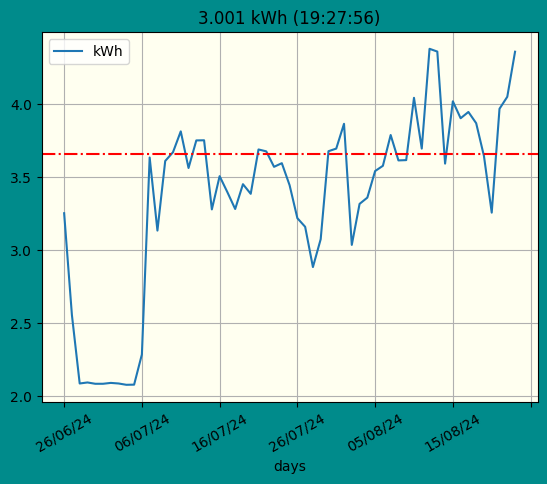

In [386]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [387]:
df_grp.mean()

kWh    3.660289
dtype: float64

In [388]:
#df_grp.head()
df_grp.tail(14)

,kWh
days,
11/08/24,3.694
12/08/24,4.378
13/08/24,4.359
14/08/24,3.591
15/08/24,4.018
16/08/24,3.902
17/08/24,3.945
18/08/24,3.868
19/08/24,3.643


In [389]:
df_grp

,kWh
days,
21/08/23,0.811
22/08/23,3.700
23/08/23,4.226
24/08/23,3.679
25/08/23,4.185
...,...
20/08/24,3.255
21/08/24,3.967
22/08/24,4.049


In [390]:
df_grp.tail(100).mean()

kWh    3.41674
dtype: float64

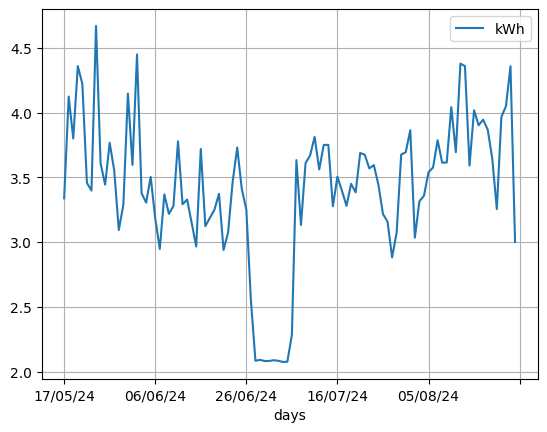

In [391]:
df_grp.tail(100).plot()
plt.grid()

In [392]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,3.663800
std,0.393744
min,2.882000
25%,3.379250
50%,3.659500
75%,3.934250
max,4.378000


In [393]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

12/08/24 4.378
28/07/24 2.882


In [394]:
day

'24/08/24'

In [395]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1351306,26474,0.14,26.474,135.982473,31812160735,2024-08-24 00:00:11.241020,24/08/24,0:0:11
1351307,26571,0.14,26.571,135.486056,31812187306,2024-08-24 00:00:37.812020,24/08/24,0:0:37
1351308,25533,0.14,25.533,140.994008,31812212839,2024-08-24 00:01:03.345020,24/08/24,0:1:3
1351309,24803,0.14,24.803,145.143733,31812237642,2024-08-24 00:01:28.148020,24/08/24,0:1:28
1351310,24805,0.14,24.805,145.132030,31812262447,2024-08-24 00:01:52.953020,24/08/24,0:1:52
...,...,...,...,...,...,...,...,...
1354302,26160,0.14,26.160,137.614679,31882093831,2024-08-24 19:25:44.337020,24/08/24,19:25:44
1354303,26094,0.14,26.094,137.962750,31882119925,2024-08-24 19:26:10.431020,24/08/24,19:26:10
1354304,26198,0.14,26.198,137.415070,31882146123,2024-08-24 19:26:36.629020,24/08/24,19:26:36
1354305,25771,0.14,25.771,139.691902,31882171894,2024-08-24 19:27:02.400020,24/08/24,19:27:2


In [396]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3001 entries, 1351306 to 1354306
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3001 non-null   int64         
 1   kWh        3001 non-null   float64       
 2   sec        3001 non-null   float64       
 3   Wh         3001 non-null   float64       
 4   cumul(ms)  3001 non-null   int64         
 5   dates      3001 non-null   datetime64[ns]
 6   days       3001 non-null   object        
 7   heure      3001 non-null   object        
 8   hours      3001 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 234.5+ KB


In [397]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1351306    00  0.14
  1351307    00  0.14
  1351308    00  0.14
  1351309    00  0.14
  1351310    00  0.14
  ...       ...   ...
  1351458    00  0.15
  1351459    00  0.15
  1351460    00  0.15
  1351461    00  0.15
  1351462    00  0.15
  
  [157 rows x 2 columns]),
 ('01',
          hours   kWh
  1351463    01  0.15
  1351464    01  0.15
  1351465    01  0.15
  1351466    01  0.15
  1351467    01  0.15
  ...       ...   ...
  1351598    01  0.12
  1351599    01  0.12
  1351600    01  0.12
  1351601    01  0.12
  1351602    01  0.12
  
  [140 rows x 2 columns]),
 ('02',
          hours   kWh
  1351603    02  0.12
  1351604    02  0.12
  1351605    02  0.12
  1351606    02  0.17
  1351607    02  0.20
  ...       ...   ...
  1351730    02  0.19
  1351731    02  0.19
  1351732    02  0.19
  1351733    02  0.19
  1351734    02  0.19
  
  [132 rows x 2 columns]),
 ('03',
          hours   kWh
  1351735    03  0.19
  1351736    03  0.19
  1351737    03  0.1

In [398]:
groupedbyhour.count()

,kWh
hours,
00,157
01,140
02,132
03,134
04,133
05,128
06,128
07,175
08,152


# Conso du jour


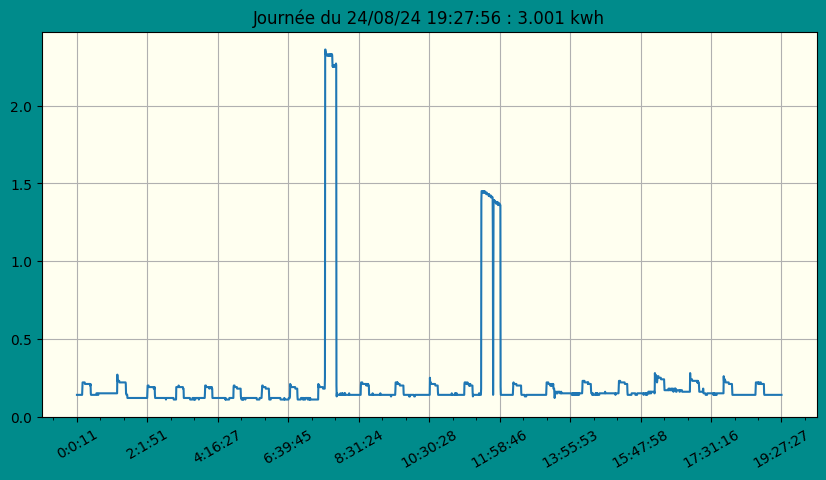

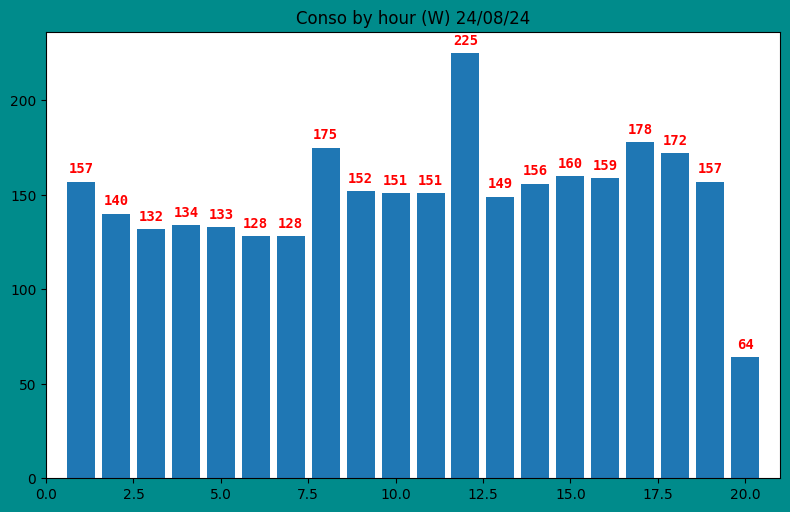

In [399]:
show(today,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
#plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [400]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [401]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [402]:
#conso_byhour(day)

In [403]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

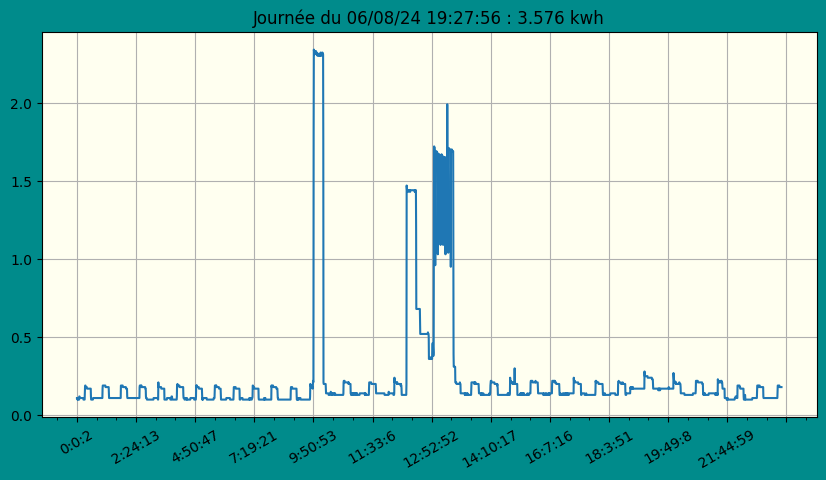

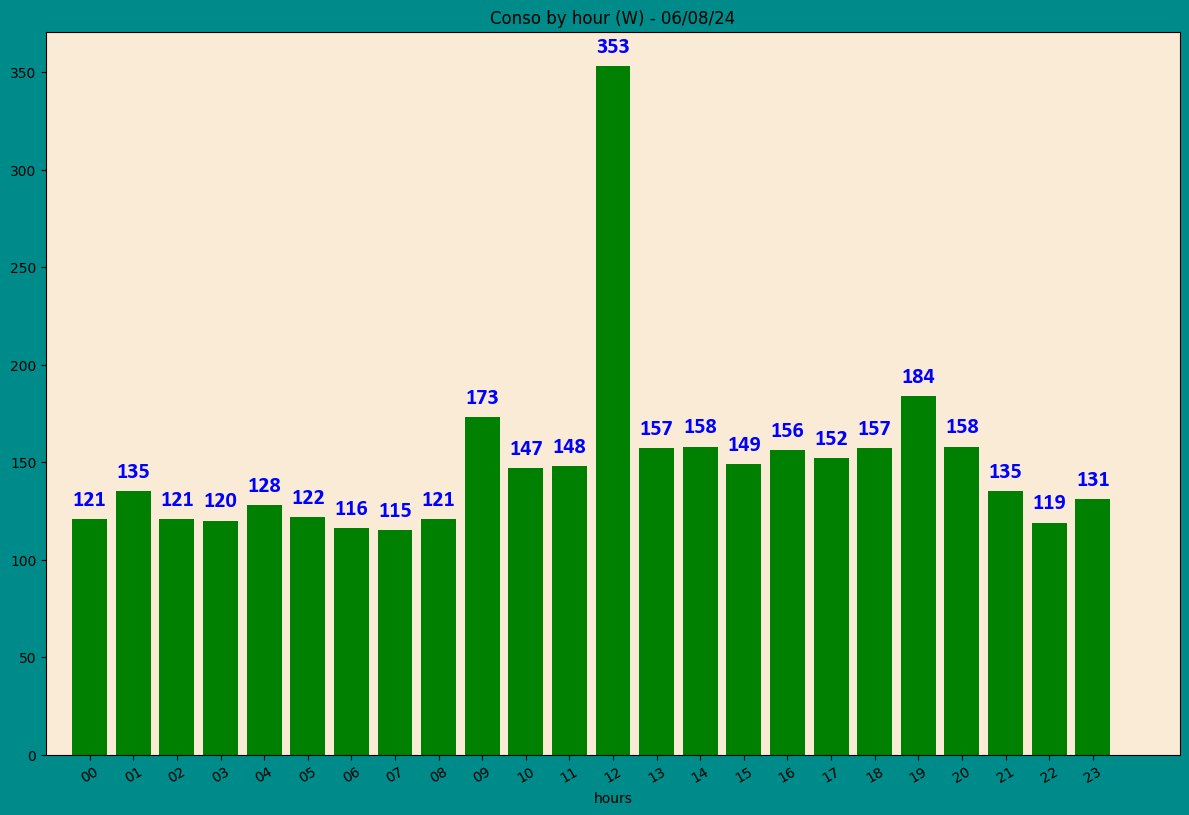

In [404]:
# plot any day
day = '06/08/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [405]:
month

days
25/07/24    3.443
26/07/24    3.217
27/07/24    3.158
28/07/24    2.882
29/07/24    3.073
30/07/24    3.676
31/07/24    3.694
01/08/24    3.864
02/08/24    3.034
03/08/24    3.315
04/08/24    3.358
05/08/24    3.540
06/08/24    3.576
07/08/24    3.787
08/08/24    3.613
09/08/24    3.615
10/08/24    4.042
11/08/24    3.694
12/08/24    4.378
13/08/24    4.359
14/08/24    3.591
15/08/24    4.018
16/08/24    3.902
17/08/24    3.945
18/08/24    3.868
19/08/24    3.643
20/08/24    3.255
21/08/24    3.967
22/08/24    4.049
23/08/24    4.358
Name: kWh, dtype: float64

In [406]:
month.idxmax()

'12/08/24'

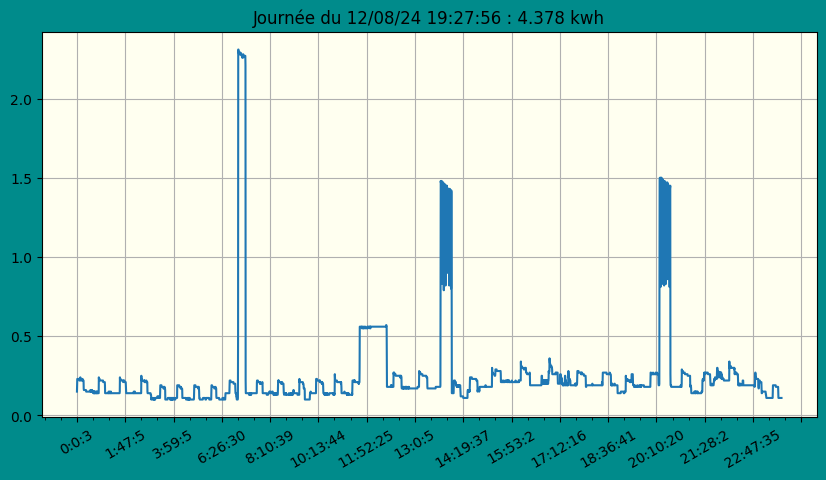

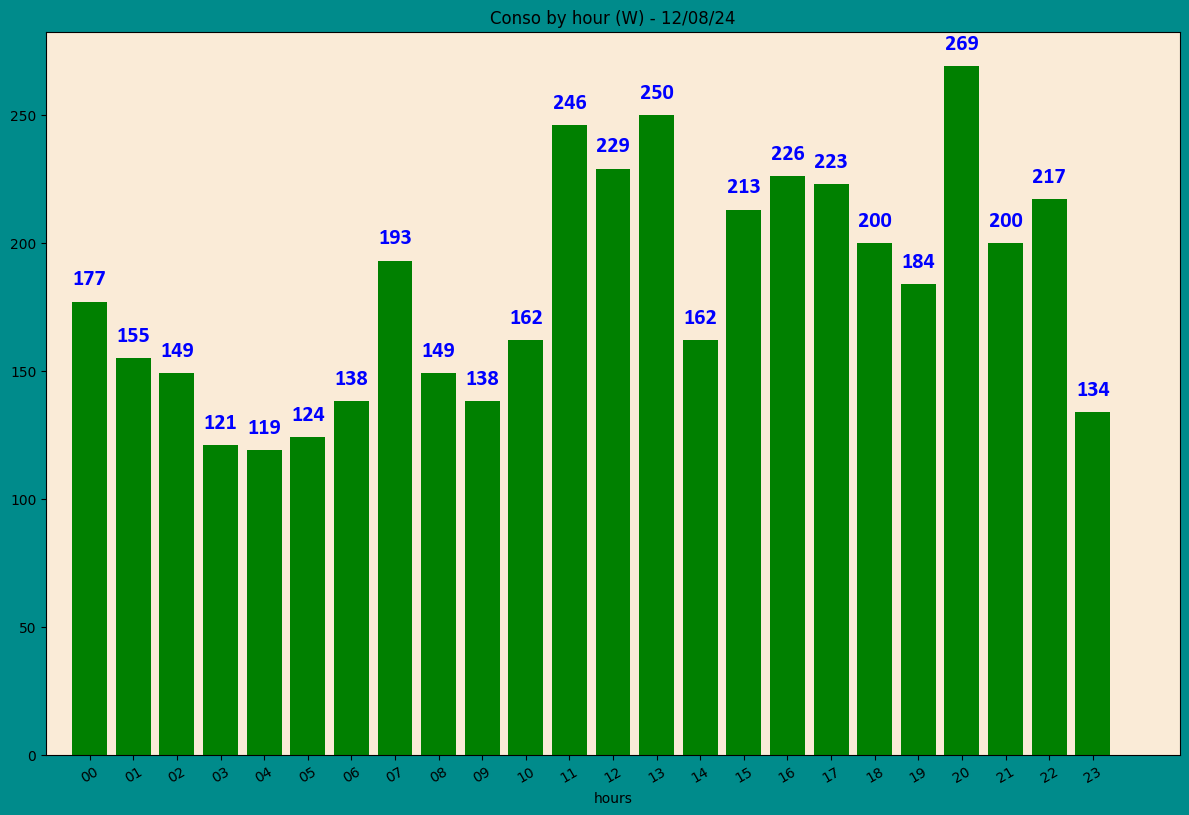

In [407]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [408]:
filename='conso_data.csv'
#conso_data.to_csv(filename)